In [4]:
library("leaps")

In [39]:
all.data <- as.matrix(read.csv("WHR.csv"), header = TRUE)
all.data <- all.data[-99, ]
country <- all.data[,1]
happiness <- as.numeric(all.data[,2])    # y
GDP <- as.numeric(all.data[,3])
soc.supp <- as.numeric(all.data[,4])
life.exp <- as.numeric(all.data[,5])
life.exp[99] = 65;
freedom <- as.numeric(all.data[,6])
generosity <- as.numeric(all.data[,7])
corruption <- as.numeric(all.data[,8])

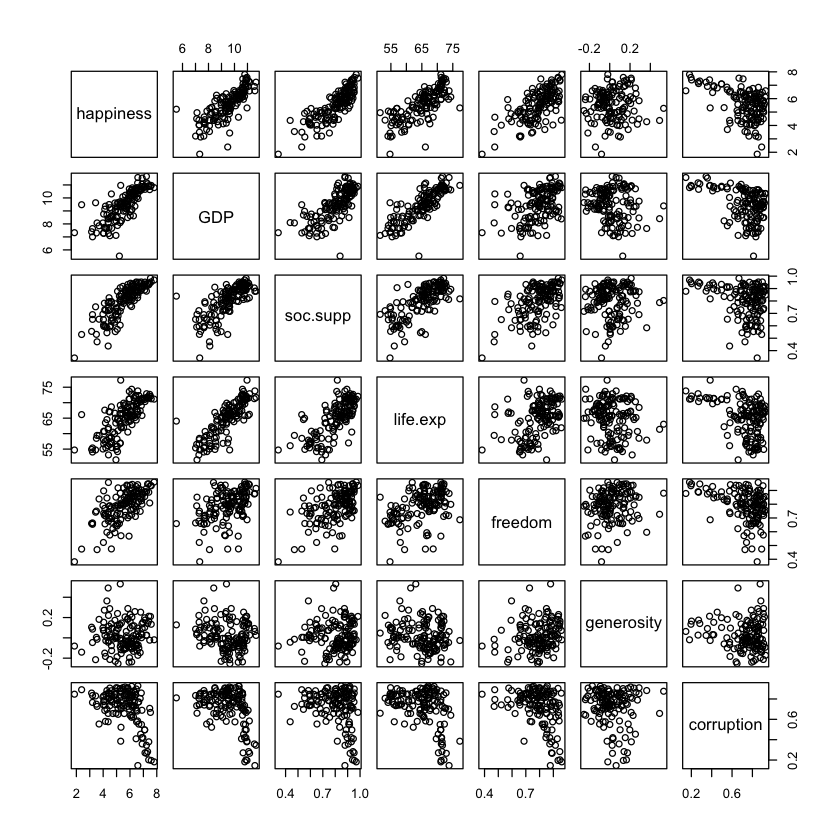

In [40]:
pairs(~happiness+GDP+soc.supp+life.exp+freedom+generosity+corruption)

In [41]:
cor(data.frame(happiness,GDP,soc.supp,life.exp,freedom,generosity,corruption))

,happiness,GDP,soc.supp,life.exp,freedom,generosity,corruption
happiness,1.00000000,0.7838363,0.83805645,0.7462293,0.6619596,0.03982861,-0.4705609
GDP,0.78383629,1.0000000,0.74176233,0.8370764,0.4494623,-0.16229841,-0.4353726
soc.supp,0.83805645,0.7417623,1.00000000,0.7229334,0.5463187,0.04052801,-0.2752549
life.exp,0.74622933,0.8370764,0.72293336,1.0000000,0.4151317,-0.13759868,-0.4037585
freedom,0.66195958,0.4494623,0.54631867,0.4151317,1.0000000,0.16466639,-0.3814667
generosity,0.03982861,-0.1622984,0.04052801,-0.1375987,0.1646664,1.00000000,-0.1183002
corruption,-0.47056085,-0.4353726,-0.27525487,-0.4037585,-0.3814667,-0.11830016,1.0000000


In [51]:
model <- lm(happiness~GDP+soc.supp+freedom+corruption)
res <- residuals(model) 
summary(model)


Call:
lm(formula = happiness ~ GDP + soc.supp + freedom + corruption)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.76279 -0.22832  0.06275  0.29644  1.02881 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.41635    0.55080  -2.571  0.01124 *  
GDP          0.25374    0.05513   4.602 9.75e-06 ***
soc.supp     4.19937    0.52220   8.042 4.60e-13 ***
freedom      2.33212    0.46275   5.040 1.52e-06 ***
corruption  -0.86952    0.27310  -3.184  0.00182 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4851 on 131 degrees of freedom
Multiple R-squared:  0.8251,	Adjusted R-squared:  0.8198 
F-statistic: 154.5 on 4 and 131 DF,  p-value: < 2.2e-16


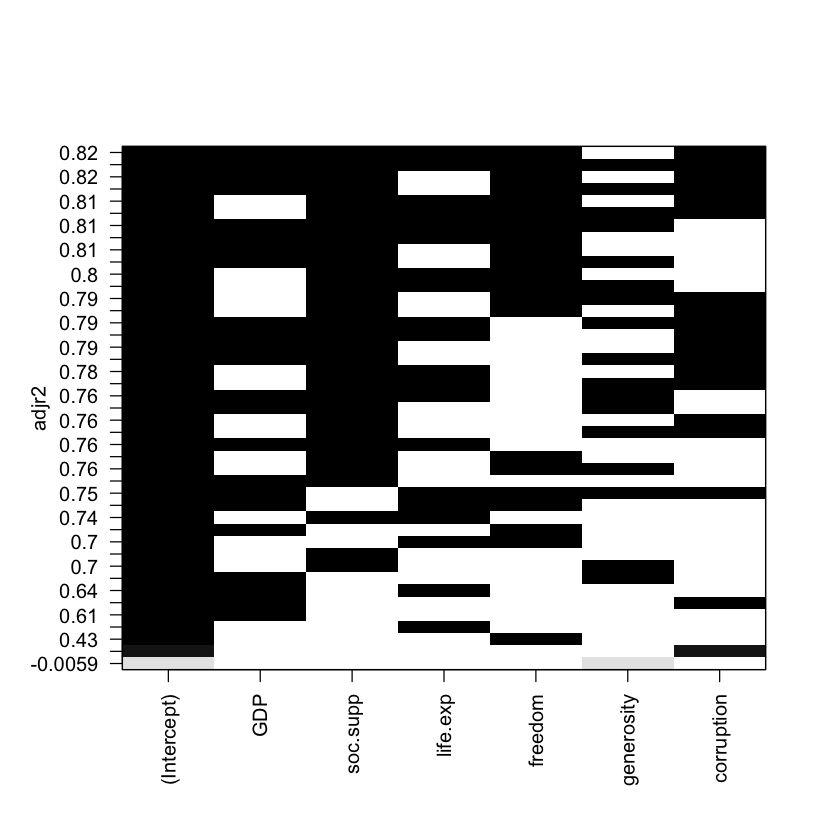

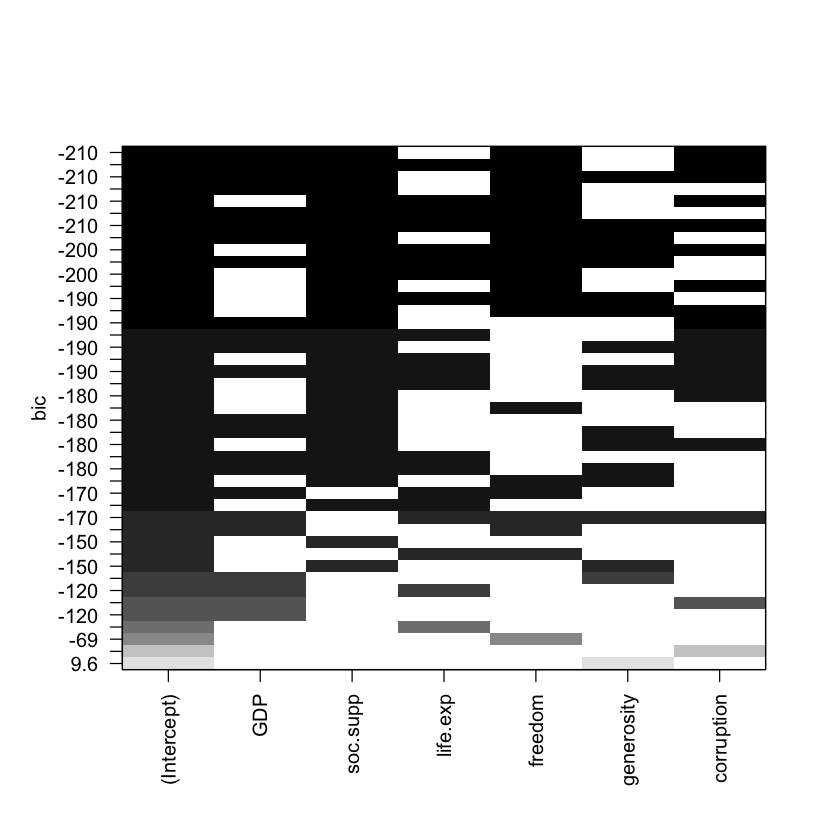

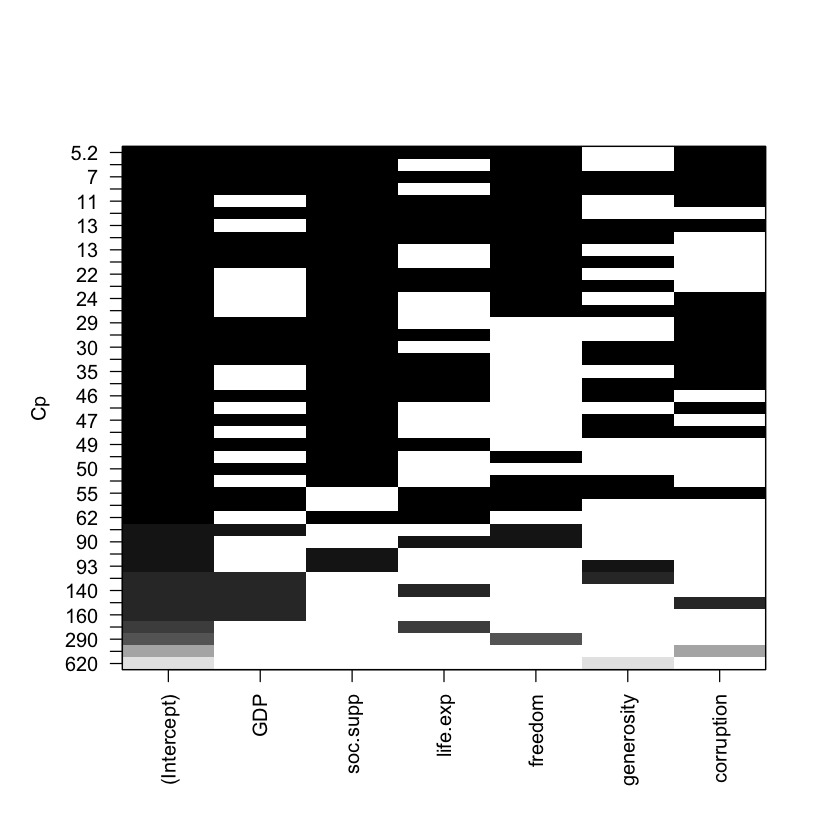

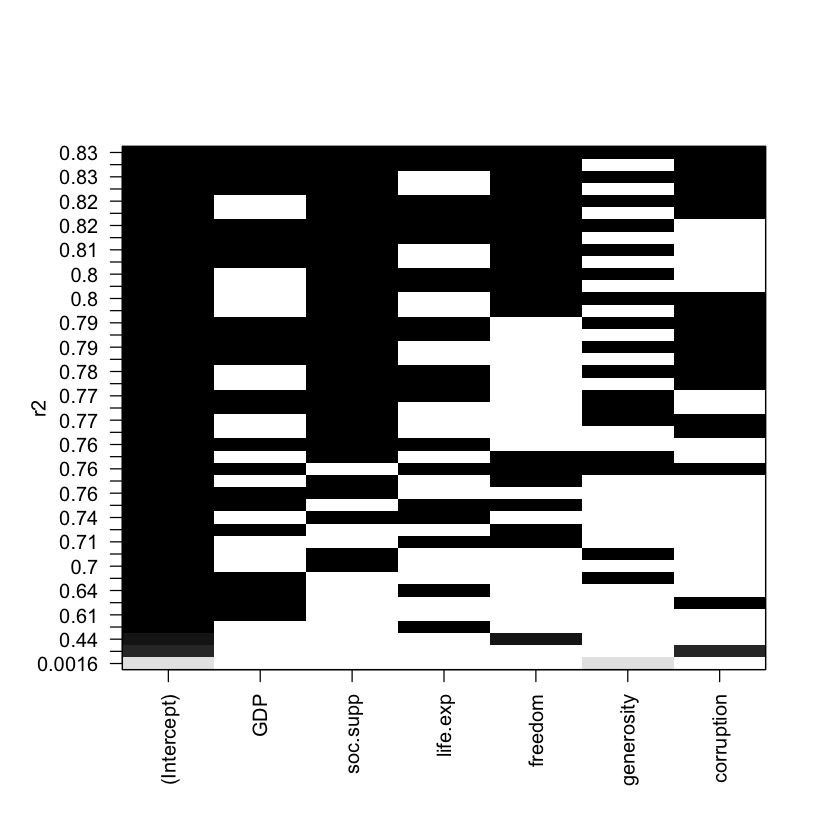

In [63]:
collection <- regsubsets(happiness ~ GDP+soc.supp+life.exp+freedom+generosity+corruption, data = data.frame(all.data),nbest=10)
plot(collection, scale="adjr2")
plot(collection, scale="bic")
plot(collection, scale="Cp")
plot(collection, scale="r2")

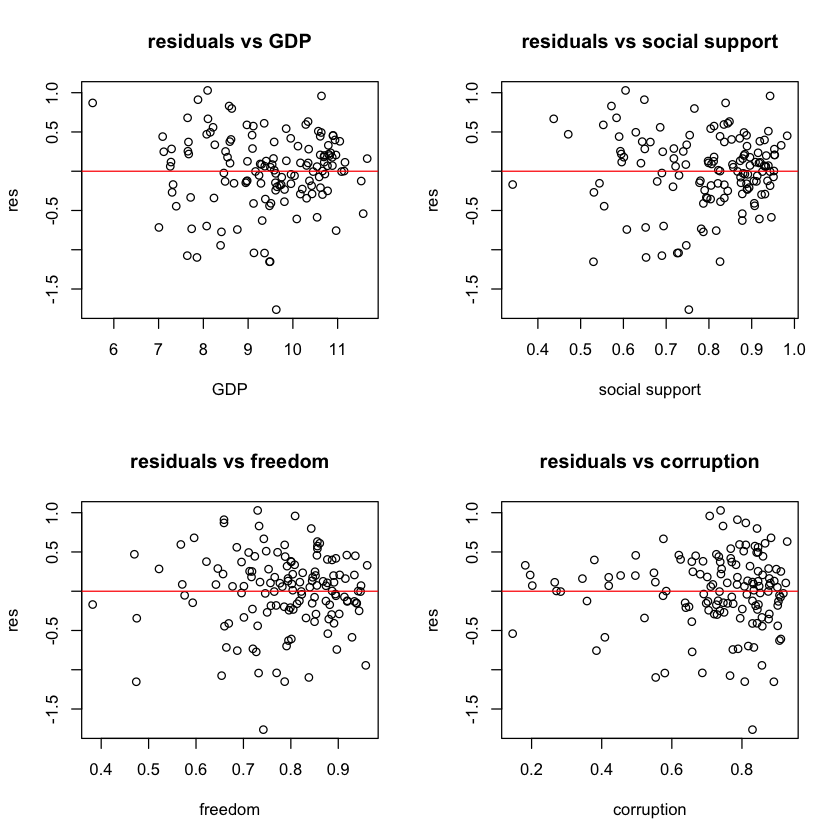

In [65]:
par(mfrow=c(2,2))
plot(GDP, res, main = "residuals vs GDP", ylab = "res", xlab="GDP")
abline(h = 0, col = "red")
plot(soc.supp, res, main = "residuals vs social support", ylab = "res", xlab="social support")
abline(h = 0, col = "red")
plot(freedom, res, main = "residuals vs freedom", ylab = "res", xlab="freedom")
abline(h = 0, col = "red")
plot(corruption, res, main = "residuals vs corruption", ylab = "res", xlab="corruption")
abline(h = 0, col = "red")

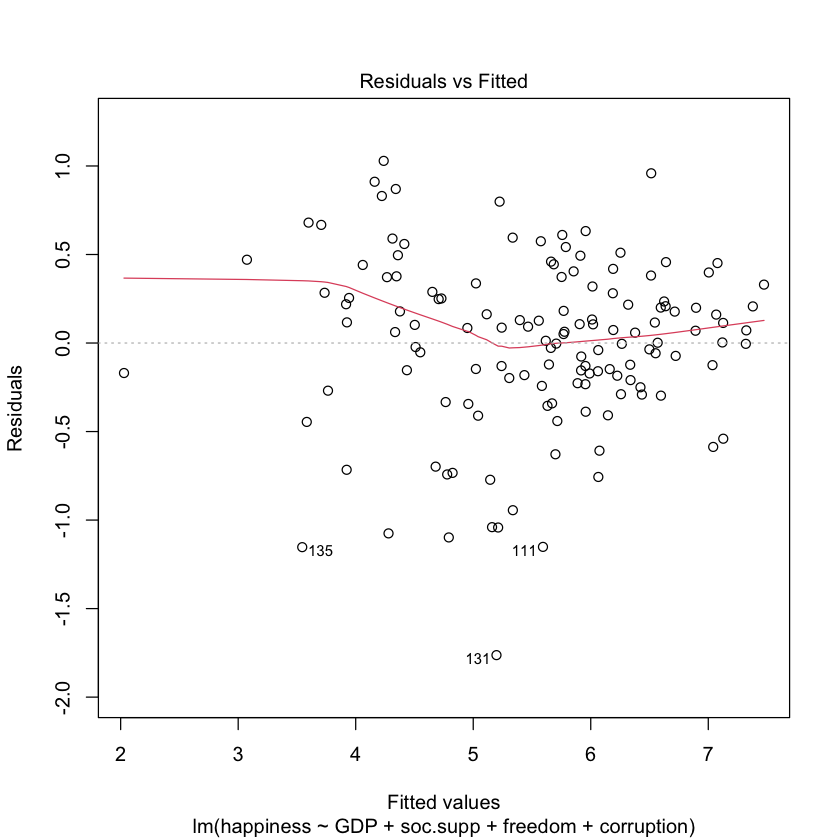

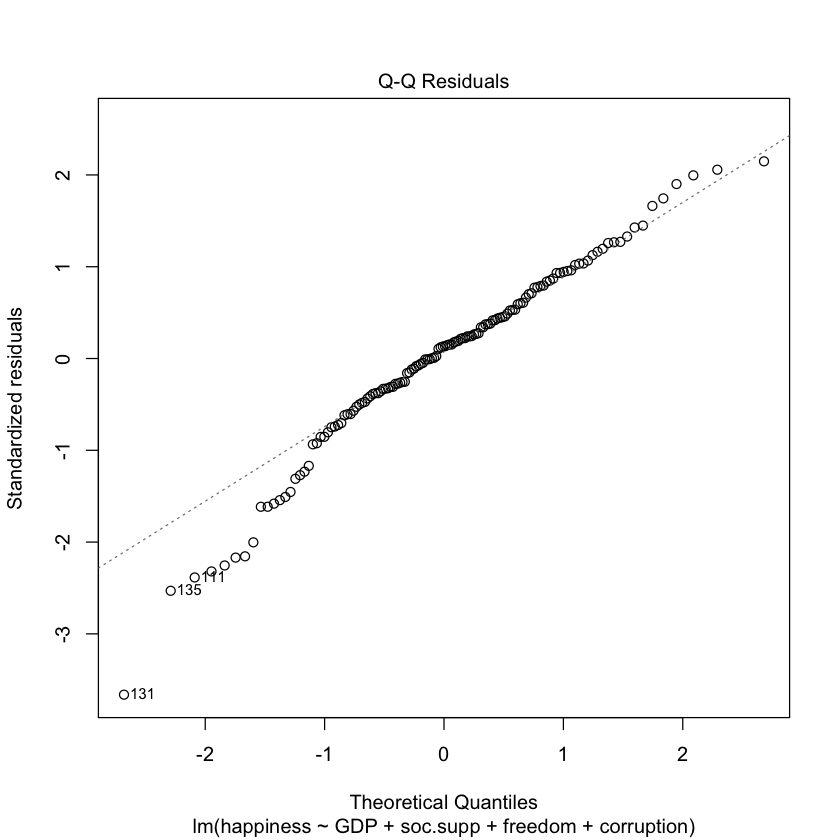

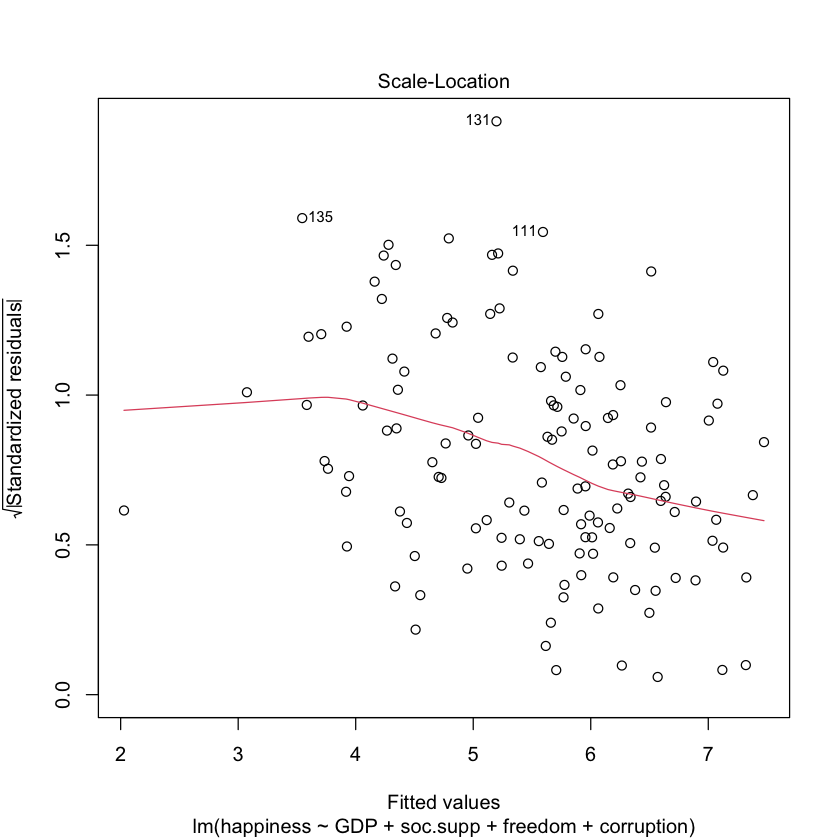

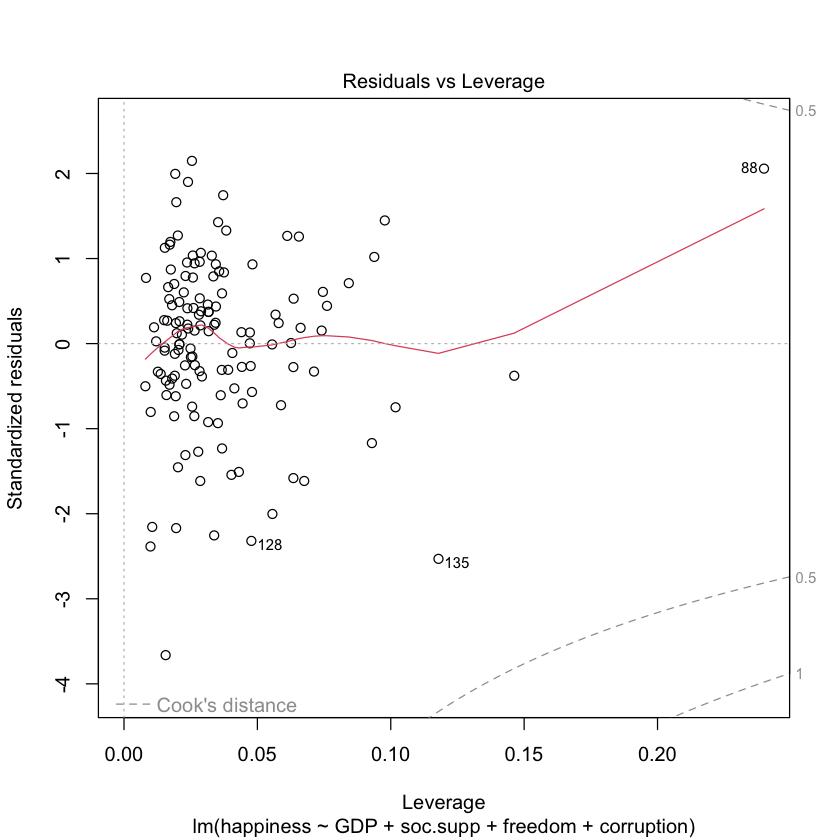

In [69]:
plot(model)